In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
# Import data
data1 = pd.read_csv("dataset 4/data1.txt", header=None)
data1.columns = ["X_i"]

In [4]:
# Check some stuff
print(data1.shape)
data1.describe()

(1000, 1)


,X_i
count,1000.000000
mean,0.241851
std,0.248158
min,0.000256
25%,0.070891
50%,0.162391
75%,0.339056
max,2.041358


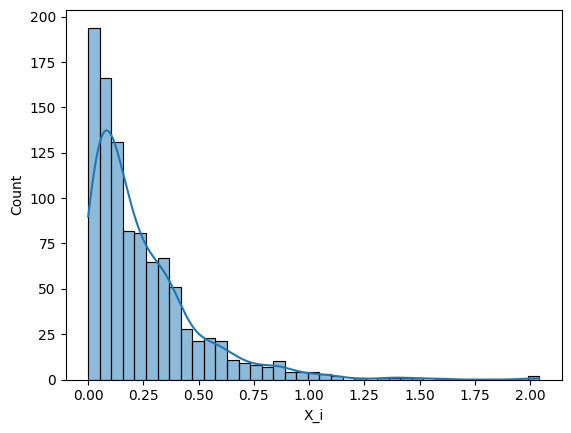

0.9610743988931559

In [8]:
sns.histplot(data1["X_i"], kde = True)
plt.show()

# Calculate Skewness and Kurtosis
# Skewness = 3 * (mean - median) / std
skewness = 3 * (np.mean(data1["X_i"]) - np.median(data1["X_i"])) / np.std(data1["X_i"])
skewness

In [6]:
# The distribution is positive and has a tail. Let's compare the qqplots
# of various distributions

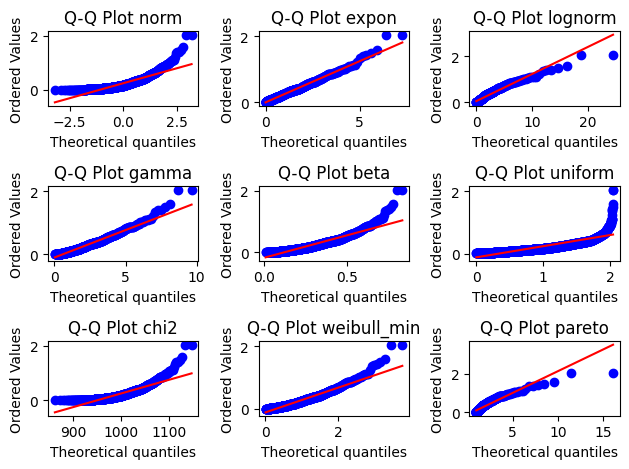

In [7]:
dists = {"norm": (), "expon": (), "lognorm": (1, ), "gamma": (2, ), "beta": (2, 5),
         "uniform":(min(data1["X_i"]), max(data1["X_i"])), "chi2": (999, ), "weibull_min": (1.5, ), "pareto": (2.62, )}
fig, axes = plt.subplots(nrows=3, ncols=3)

axes = axes.flatten()

for i, d in enumerate(dists):
    sparams = dists.get(d, ())
    ax = axes[i]
    stats.probplot(data1["X_i"], dist=d, sparams = sparams, plot = ax)
    
    ax.set_title(label = "Q-Q Plot " + d)
    
plt.tight_layout()
plt.show()

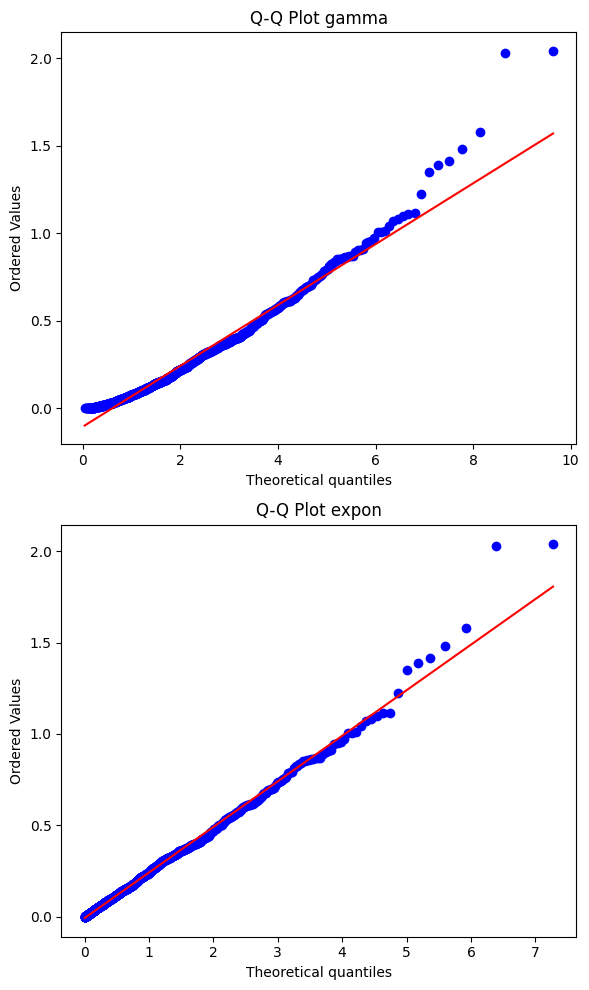

In [8]:
# Exponential and gamma distributions seem worth looking into.
dists = {"gamma": (2, ), "expon": ()}
fig, axes = plt.subplots(nrows=2, figsize=(6, 10))

axes = axes.flatten()

for i, d in enumerate(dists):
    sparams = dists.get(d, ())
    ax = axes[i]
    stats.probplot(data1["X_i"], dist=d, sparams = sparams, plot = ax)
    
    ax.set_title(label = "Q-Q Plot " + d)
    
plt.tight_layout()
plt.show()

In [9]:
from scipy.stats import kstest

mean = data1["X_i"].mean()

# Kolmogorov-Smirnov Test against a normal distribution
ks_test = kstest(data1['X_i'], 'expon', args=(0, mean))
print('Kolmogorov-Smirnov Test:', ks_test)


Kolmogorov-Smirnov Test: KstestResult(statistic=0.01828426077066303, pvalue=0.8855185290507486, statistic_location=0.4116756, statistic_sign=1)


In [10]:
# NICE!!! The p-value is almost 1. We do not have sufficient
# evidence to reject the null hypothesis. We can assume that
# the distribution is exponential. Proceeding with the question.

**MME** of $\theta$ for an exp dist is $\overline{x}$:

$$\hat{\theta}_{MME} = \overline{x}$$

$$ \frac{\sum_{i=1}^{n} {X_i}}{n}$$

**MLE** of $\theta$ for an exp dist is **also** $\overline{x}$:
$$ \hat{\theta}_{MLE} = \overline{x} $$



In [25]:
# Take a random sample

random_sample1 = data1["X_i"].sample(100, replace=False, random_state = 1982)

# Calculate x_bar
summation = sum(random_sample1)
average = summation / 100
print(average)

0.256942139693


$$ \hat{\theta}_{MME} \approx{0.257}$$

$$ \hat{\theta}_{MLE} \approx{0.257}$$

## 2 
#### a)
Because MLE and MME estimators are equal, they have the same variance. Their relative efficiency is 1.

#### b)
$$CRLB = \frac{[\tau'(\theta)]^2}{I_n(\theta)} = \cdots = \frac{\theta^2}{n}$$
Through CRLB method, $\overline{x}$ is UMVU for $\hat{\theta}$.

$$E[\hat{\theta}] = \frac{E \left[\sum_{i=1}^{n}{x_i} \right]}{n} = \frac{n \cdot \theta}{n} = \overline{x} \approx 0.257$$

$$V[\hat{\theta}] = \frac{V \left[\sum_{i=1}^{n}{x_i} \right]}{n^2} = \frac{n \cdot \theta^2}{n^2} = \frac{\theta^2}{n} = \frac{\overline{x}^2}{n} \approx 0.0257^2$$

As sample size increase, $\theta$ is distributed normally.  $ \hat{\theta} \sim N(0.257, 0.0257^2) $


## 3

#### a)
$P(X \gt \alpha) = 1 - F(X)$

CDF of Exponential distribution:
$$ F(X) = 1 - e^{-\frac{x}{\hat{\theta}}}$$
Substitute with UMVU:
$$ P(X \gt \alpha) = 1 - F(X) = e^{-\frac{\alpha}{\overline{x}}}$$

Substitute with UMVU:
$$ P(X \lt \alpha) = F(X) = 1 - e^{-\frac{\alpha}{\overline{x}}}$$

#### b) 
MME estimator is also UMVUE. Hence, it is the same. Pick $\alpha$ to be double the sample mean.

What is the probability of observing a lifetime greater than double the average lifetime of the sample?
$$P(X > 2\bar{x}) = e^{-\frac{2\overline{x}}{\overline{x}}} \approx 0.135$$
$$P(X < 2\bar{x}) = 1 - e^{-\frac{2\overline{x}}{\overline{x}}} \approx 0.865$$